<a href="https://colab.research.google.com/github/KaiDove1/Investment_Banking/blob/main/ybr8ff_codeathon_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Codeathon 3: AI Chatbot Generation with LLMs
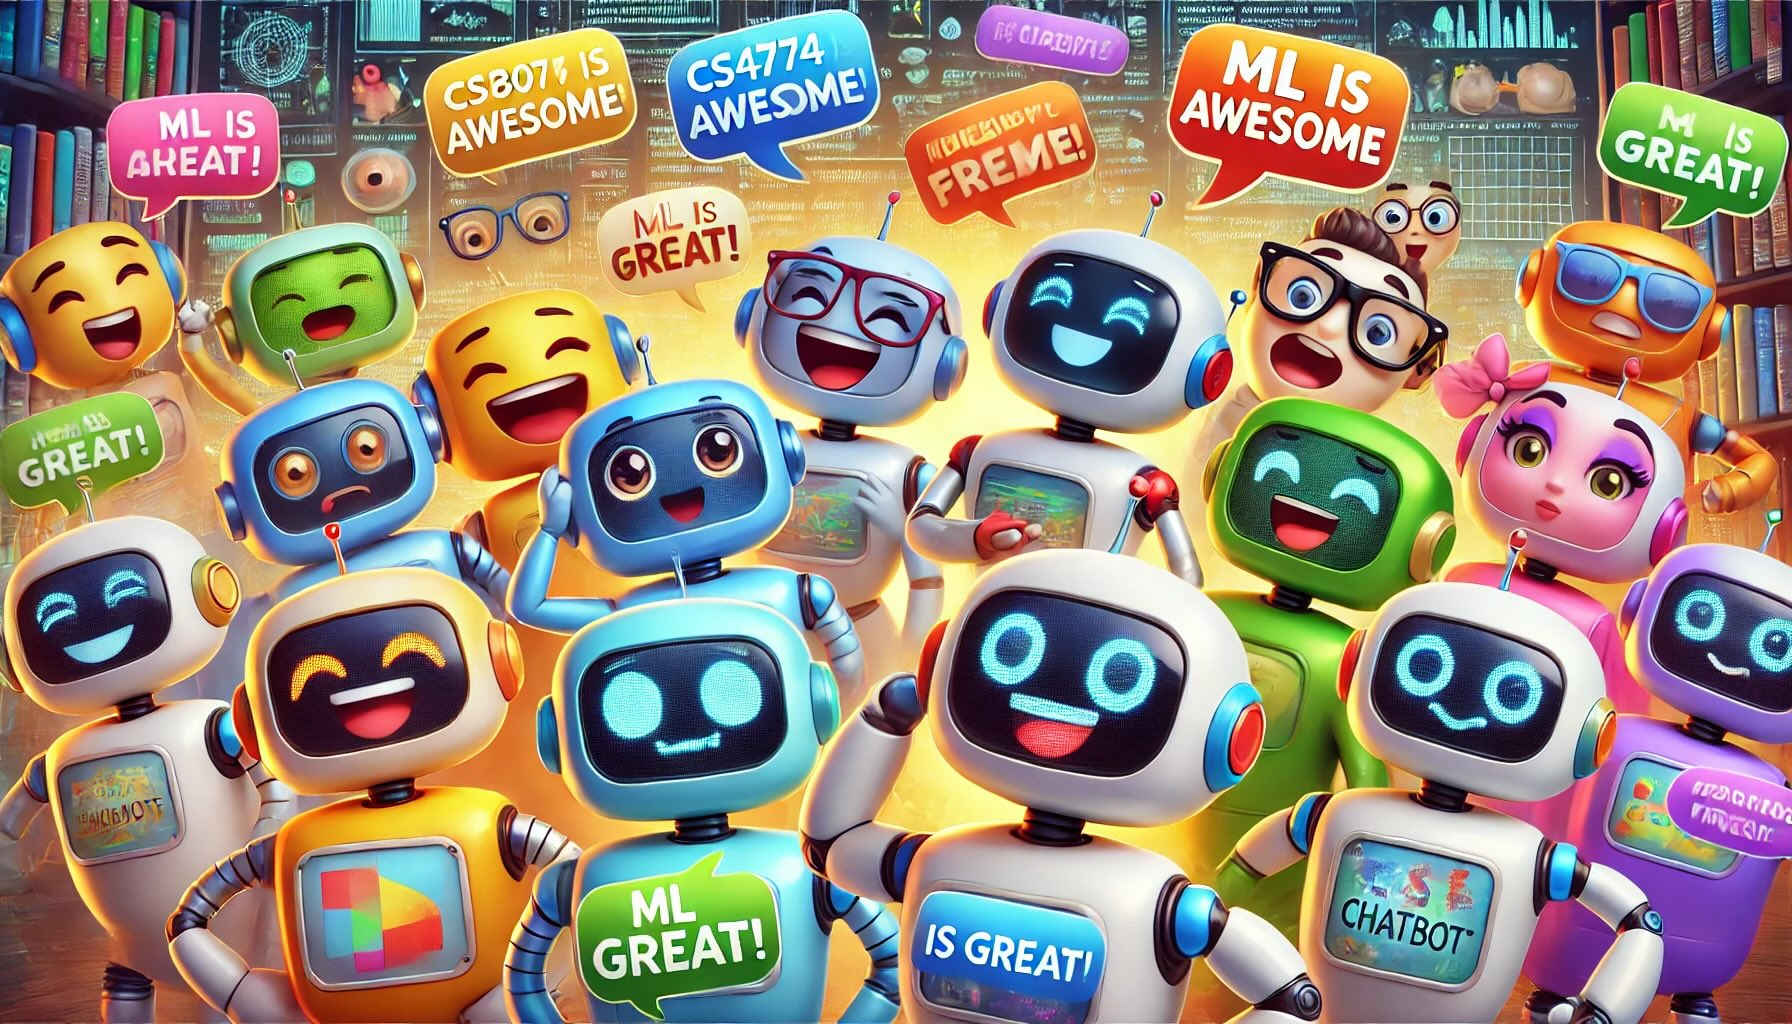
Alan Turing once posed the question, "Can machines think?" Today, chatbots powered by large language models (LLMs) are among the most sophisticated examples of machines engaging in human-like conversation. For this Codeathon, your task is to leverage an LLM to build a chatbot that can understand and respond intelligently to user queries. This chatbot will explore natural language processing, sequence modeling, and language generation fundamentals.

In this codeathon, you'll implement at least two out of three leading LLMs—OpenAI GPT, Meta LLaMA, and Google Gemini—to build your chatbot. You'll then analyze the unique characteristics and performance of each model, iterating with fine-tuning to see how the models evolve in response quality.

* **Design**: Your task is to connect and configure the LLMs and implement them in a chatbot that can handle structured, engaging conversations. You will observe and analyze differences between the models in handling conversations. You'll also fine-tune the model to improve response quality.

* **Implementation**: To get you started, you can use the code provided in the template. You'll integrate each model via API, compare responses, and implement a chatbot-to-chatbot loop where the two models "talk" to each other for a fixed number of exchanges. Fine-tune the models using a small/large dataset to see how their responses improve. Finally, implement a benchmark system that ranks the performance of each LLMs based on a standardized test, helping you compare the effectiveness of each model.


To make it easier for you, some code has been provided to help you connect with the APIs and process the data. You may modify it to fit your needs. Please submit the .ipynb file via UVA Canvas in the following format: **yourComputingID_codeathon_3.ipynb**


**Important Note**: Make sure your submission contains the outputs as TAs will not be able to directly run your code due to API security.

## 1. Dependencies
**Objective**: Set up the necessary environment and install dependencies to run the models.

*   Install Necessary Libraries: Download and install packages such as transformers, torch, and openai.
* Important Note: Use a T4 or equivalent GPU in Colab for optimal performance, as some functions require GPU access.

In [1]:
# Install the OpenAI library for interacting with OpenAI's GPT models
!pip install openai
# Install the Google Generative AI library for interacting with Google Gemini models
!pip install -q -U google-generativeai
# Install Hugging Face Transformers, PyTorch, and Accelerate for working with various language models
# Install bitsandbytes for efficient model quantization
!pip install transformers torch accelerate bitsandbytes
# Upgrade Transformers to the latest version to ensure compatibility with recent models and features
!pip install --upgrade transformers
# (Optional) Install llama-recipes if you plan to fine-tune LLaMA models; also install ipywidgets for interactive widgets in Jupyter
# !pip install llama-recipes ipywidgets
# Install NLTK and rouge-score for evaluating text generation models using BLEU, ROUGE, and other language metrics
!pip install nltk rouge-score
# Install bert-score for evaluating model performance based on BERT embeddings for semantic similarity
!pip install bert-score
!pip install bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.3
    Uninstalling transformers-4.46.3:
      Successfully uninstalled transformers-4.46.3
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=c2949249d3ef8f0e6b1858be36866319f63f010748b49f10c458b4abd734a425
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-sco

## 2. Models Setup
**Objective**: Explore at least two out of three models available in this Codeathon—GPT, LLaMA, and Gemini—and use them to perform text generation. Optional tasks include multimedia generation and analysis.

*   Check [Video](https://youtu.be/tD4eW3q02ZE?si=wqgrCeCL27TtKnoF) Tutorial for step-by-step API key setup corresponding to [ReadMe](https://docs.google.com/document/d/1S0wQ4bc88NMbjQJRrU86mRPxoi_urUL4uD5tTo-9KYQ/edit?usp=sharing).
* Model Initialization: Configure each model you choose through its API through corresponding Classes **(Gemini_Chatbot(), LLaMA_Chatbot(), OpenAI_Chatbot())** for generating responses.
* Make sure your chatbots could access the **entire chat history** instead of the just last reply and be able to **reset** the chat history. Print results to check!
* Text Generation: Test each model on basic text-generation tasks. Note the style, coherence, and clarity of their responses.
* (Optional) Multimedia Support:

 * Audio Input: Test a model that can analyze audio input.
 * Image Input: Test a model that can analyze image input.
 * Generation: Use a model to generate image and audio output if possible.

Please Note: While Meta Llama and Google Gemini offer free models usage through APIs, OpenAI GPT is not free of charge. Check the Video for more information.

Official Documentations: [Google Gemini Documentation](https://ai.google.dev/api?authuser=2&lang=python), [OpenAI GPT Documentation](https://platform.openai.com/docs/overview), [Meta Llama Documentation](https://www.llama.com/docs/overview).








### Gemini

In [2]:
# Take Gemini as an example, you don't have to use it.
import google.generativeai as genai
# Get access to the colab secret key chain
from google.colab import userdata

# Example Set Up of the API key stored in Google Colab secret keys
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

class Gemini_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant."):
        self.model = genai.GenerativeModel("gemini-1.5-flash") #choose your model here
        self.history = [{"role": "model", "parts": system_prompt}]
        self.system_prompt = system_prompt
        self.chat = self.model.start_chat(history=self.history)

    # To do: implment the convser function to return the gemini response for specific prompt you input.
    # Make sure to add the conversation to the chat history.
    def converse(self, user_input):
        try:
            self.history.append({"role": "user", "parts": user_input})
            response = self.chat.send_message(user_input)

            self.history.append({"role": "model", "parts": response.text})

            return response.text

        except Exception as e:
            print(f"Error in conversation: {e}")
            return None

    # To do: implment reset function.
    def reset(self, system_prompt="You are a helpful assistant."):
        try:
            self.system_prompt = system_prompt
            self.history = [{"role": "model", "parts": system_prompt}]
            self.chat = self.model.start_chat(history=self.history)
            return True

        except Exception as e:
            print(f"Error in reset: {e}")
            return False


    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["parts"]
            print(f"{role}: {content}\n")

# Test your implmentation!
gemini_chatbot = Gemini_Chatbot()

prompt = "Explain the concept of Generative AI."
response = gemini_chatbot.converse(prompt)
prompt = "How does it differ from traditional programming?"
response = gemini_chatbot.converse(prompt)
print("Conversation History:\n")
gemini_chatbot.print_history()

gemini_chatbot.reset()
print("\nConversation history has been reset.")
print("\nCurrent Conversation History after Reset:\n")
gemini_chatbot.print_history()

Error in conversation: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key expired. Please renew the API key.
Conversation History:

Model: You are a helpful assistant.

User: Explain the concept of Generative AI.

User: How does it differ from traditional programming?

Model: Please clarify what "it" refers to.  I need to know what technology or methodology you're comparing to traditional programming to give you a helpful answer.  For example, are you asking about:

* **AI programming?**  This differs in that you often don't explicitly write the entire algorithm; instead, you train a model on data, and the model learns the patterns.  Traditional programming involves explicitly defining every step.
* **No-code/low-code platforms?** These abstract away much of the underlying code, allowing users to build applications through visual interfaces and pre-built components.  Traditional programming requir

Conversation History:

Model: You are a helpful assistant.

User: Explain the concept of Generative AI.

User: How does it differ from traditional programming?

Model: Please clarify what "it" refers to.  I need to know what technology or methodology you're comparing to traditional programming to give you a helpful answer.  For example, are you asking about:

* **AI programming?**  This differs in that you often don't explicitly write the entire algorithm; instead, you train a model on data, and the model learns the patterns.  Traditional programming involves explicitly defining every step.
* **No-code/low-code platforms?** These abstract away much of the underlying code, allowing users to build applications through visual interfaces and pre-built components.  Traditional programming requires writing code directly.
* **Functional programming?** This paradigm emphasizes immutability and functions as first-class citizens, differing from traditional imperative programming (like C or early versions of BASIC) which focuses on statements that change the program's state.
* **Quantum programming?** This leverages the principles of quantum mechanics to perform computations, vastly different from classical programming's reliance on bits and Boolean logic.
* **Declarative programming (e.g., SQL, Prolog)?**  This focuses on *what* result is desired, rather than *how* to achieve it, unlike imperative programming which specifies the exact steps.
* **Event-driven programming?**  This relies on responding to events rather than following a strict linear flow of execution.  Traditional procedural programming is often more sequential.


Once you specify "it", I can provide a detailed comparison to traditional programming.



Conversation history has been reset.

Current Conversation History after Reset:

Model: You are a helpful assistant.


### Llama

In [ ]:
import transformers
import torch
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from huggingface_hub import login
from google.colab import userdata

class LLaMA_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant.", model_id="meta-llama/Llama-3.2-1B-Instruct"):
        my_secret_key = userdata.get('HF_TOKEN')
        login(token=my_secret_key)

        bnb_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_use_double_quant=True,
            bnb_4bit_quant_type='nf4',
            bnb_4bit_compute_dtype=torch.bfloat16
        )

        self.tokenizer = AutoTokenizer.from_pretrained(model_id)
        self.tokenizer.pad_token = self.tokenizer.eos_token

        self.model = AutoModelForCausalLM.from_pretrained(
            model_id,
            quantization_config=bnb_config,
            device_map='auto'
        )

        self.text_generator = transformers.pipeline(
            "text-generation",
            model=self.model,
            tokenizer=self.tokenizer,
            max_new_tokens=1024
        )

        self.history = [{"role": "system", "content": system_prompt}]
        self.system_prompt = system_prompt


    # To do: implment the convser function to return the llama response for specific prompt you input.
    # Make sure to add the conversation to the chat history.
    # You are welcome to use format_history() function here.
    def converse(self, user_input):
        try:
            self.history.append({"role": "user", "content": user_input})
            formatted_prompt = self.format_history()

            response = self.text_generator(
                formatted_prompt,
                do_sample=True,
                temperature=0.7,
                top_p=0.9,
                num_return_sequences=1
            )[0]['generated_text']

            new_response = response[len(formatted_prompt):].strip()

            self.history.append({"role": "assistant", "content": new_response})

            return new_response

        except Exception as e:
            print(f"Error in conversation: {e}")
            return None

    # To do: implment reset function.
    def reset(self, system_prompt="You are a helpful assistant."):
        try:
            self.system_prompt = system_prompt
            self.history = [{"role": "system", "content": system_prompt}]
            return True

        except Exception as e:
            print(f"Error in reset: {e}")
            return False

    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["content"]
            print(f"{role}: {content}\n")

    def format_history(self):
        formatted = ""
        for message in self.history:
            role = message["role"].capitalize()
            content = message["content"]
            formatted += f"{role}: {content}\n"
        return formatted


# Test your implmentation!
llama_chatbot = LLaMA_Chatbot()

prompt = "Explain the concept of Generative AI."
response = llama_chatbot.converse(prompt)
prompt = "How does it differ from traditional programming?"
response = llama_chatbot.converse(prompt)

print("Conversation History:\n")
llama_chatbot.print_history()

llama_chatbot.reset()
print("\nConversation history has been reset.")
print("\nCurrent Conversation History after Reset:\n")
llama_chatbot.print_history()


CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend


RuntimeError: CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend

### GPT

In [17]:
from google.colab import userdata
from openai import OpenAI

class OpenAI_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant."):
        self.api_key = userdata.get("OPENAI_API")
        self.client = OpenAI(api_key=self.api_key)
        self.history = [{"role": "system", "content": system_prompt}]
        self.model = "gpt-4o"  # You can change to "gpt-4" if you have access
        self.system_prompt = system_prompt

    # To do: choose your model here and implment the convser function to return the gpt response for specific prompt you input.
    # Make sure to add the conversation to the chat history.
    def converse(self, user_input):
        try:
            self.history.append({"role": "user", "content": user_input})

            response = self.client.chat.completions.create(
                model=self.model,
                messages=self.history,
                temperature=0.7,
                max_tokens=1000,
                top_p=0.9,
                frequency_penalty=0,
                presence_penalty=0
            )

            bot_response = response.choices[0].message.content
            self.history.append({"role": "assistant", "content": bot_response})

            return bot_response

        except Exception as e:
            print(f"Error in conversation: {e}")
            return None

    # To do: implment reset function.
    def reset(self, system_prompt="You are a helpful assistant."):
        try:
            self.system_prompt = system_prompt
            self.history = [{"role": "system", "content": system_prompt}]
            return True

        except Exception as e:
            print(f"Error in reset: {e}")
            return False


    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["content"]
            print(f"{role}: {content}\n")


# Test your implementation!
openai_chatbot = OpenAI_Chatbot()

prompt = "Explain the concept of Generative AI."
response = openai_chatbot.converse(prompt)
prompt = "How does it differ from traditional programming?"
response = openai_chatbot.converse(prompt)

print("Conversation History:\n")
openai_chatbot.print_history()

openai_chatbot.reset()
print("\nConversation history has been reset.")
print("\nCurrent Conversation History after Reset:\n")
openai_chatbot.print_history()


Error in conversation: 'OpenAI_Chatbot' object has no attribute 'client'
Error in conversation: 'OpenAI_Chatbot' object has no attribute 'client'
Conversation History:

System: You are a helpful assistant.

User: Explain the concept of Generative AI.

User: How does it differ from traditional programming?


Conversation history has been reset.

Current Conversation History after Reset:

System: You are a helpful assistant.



Conversation History:

System: You are a helpful assistant.

User: Explain the concept of Generative AI.

Assistant: Generative AI refers to a class of artificial intelligence systems that are designed to generate new content. This content can include text, images, music, or even code. These systems are typically based on machine learning models that have been trained on large datasets, allowing them to understand patterns and structures within the data and use that understanding to create new, original outputs.

The most common types of models used in generative AI include:

1. **Generative Adversarial Networks (GANs):** Introduced by Ian Goodfellow and his colleagues in 2014, GANs consist of two neural networks: a generator and a discriminator. The generator creates new data instances, while the discriminator evaluates them. The two networks are trained simultaneously, with the generator improving its outputs to fool the discriminator, leading to the generation of highly realistic data.

2. **Variational Autoencoders (VAEs):** VAEs are a type of neural network architecture that learns to encode input data into a lower-dimensional space and then decode it back to its original form. This encoding-decoding process allows the model to learn a latent representation of the data, which can be used to generate new data samples that resemble the original dataset.

3. **Transformer Models:** These models, such as GPT (Generative Pre-trained Transformer) by OpenAI, are particularly popular for text generation. They use a mechanism called self-attention to process input data and generate coherent and contextually relevant text. Transformers have revolutionized the field of natural language processing (NLP) and are now being adapted for tasks beyond text, including image generation.

4. **Diffusion Models:** These are a newer class of generative models that learn to generate data by reversing a diffusion process that gradually adds noise to data until it is unrecognizable. By learning the reverse process, the model can generate new data from noise.

Generative AI has numerous applications across various domains:

- **Art and Creativity:** Generative AI can create paintings, music, and other forms of art, offering new tools for artists and creators.
- **Content Creation:** AI can assist in writing articles, generating dialogue for video games, or creating marketing copy.
- **Design and Prototyping:** It can be used to generate design ideas for products, architecture, and fashion.
- **Data Augmentation:** In machine learning, generative AI can create synthetic data to augment training datasets, improving model performance.
- **Healthcare:** It can be used to generate medical images or simulate biological processes for research.

However, generative AI also raises ethical and societal concerns, such as the potential for creating misleading or harmful content, including deepfakes, and issues related to intellectual property and authorship. Addressing these challenges requires ongoing research and thoughtful consideration of the technology's impact.

User: How does it differ from traditional programming?

Assistant: Generative AI differs from traditional programming in several fundamental ways:

1. **Approach to Problem Solving:**
   - **Traditional Programming:** Involves explicitly coding instructions for the computer to follow. The programmer defines rules and logic to solve specific problems or perform tasks. The output is directly determined by these predefined rules.
   - **Generative AI:** Instead of explicitly programming rules, generative AI models learn patterns from large datasets. These models use these learned patterns to generate new content. The process is data-driven, and the AI "learns" from examples rather than being explicitly programmed for each specific output.

2. **Nature of Output:**
   - **Traditional Programming:** Produces deterministic outputs. Given the same input, the program will always produce the same output, assuming no random processes are involved.
   - **Generative AI:** Produces probabilistic and often non-deterministic outputs. The same input can result in different outputs due to the inherent randomness in the generation process, particularly in models like GANs and VAEs.

3. **Flexibility and Adaptability:**
   - **Traditional Programming:** Requires significant effort to modify or adapt to new tasks, as changes often mean rewriting or adding code to accommodate new rules or logic.
   - **Generative AI:** Can adapt to new tasks with relatively less effort by retraining or fine-tuning the model with new data. This adaptability is a key advantage in rapidly changing environments or applications that require creativity and variety.

4. **Role of Data:**
   - **Traditional Programming:** Data is used as input to the program, but the logic and operations on the data are explicitly defined by the programmer.
   - **Generative AI:** Data is central to the learning process. The AI model relies on large datasets to learn how to generate new outputs. The quality and diversity of the data significantly influence the model's performance.

5. **Development Process:**
   - **Traditional Programming:** Involves writing, testing, and debugging code. The focus is on ensuring the code behaves as expected under various conditions.
   - **Generative AI:** Involves designing model architectures, training models on data, and iteratively improving performance through techniques like hyperparameter tuning. The focus is on optimizing the model's ability to generalize and generate realistic outputs.

6. **Complexity of Tasks:**
   - **Traditional Programming:** Well-suited for tasks with clear, logical rules and predictable outcomes, such as calculations, data processing, and automation of repetitive tasks.
   - **Generative AI:** Excels in tasks that require creativity, pattern recognition, and handling complex data distributions, such as generating realistic images, composing music, or simulating human-like text.

Overall, generative AI represents a paradigm shift from rule-based programming to data-driven learning, opening up new possibilities for automation and creativity but also introducing challenges related to data quality, ethical considerations, and control over the generated outputs.


Conversation history has been reset.

Current Conversation History after Reset:

System: You are a helpful assistant.

## 3. Build Chatbots - Enable End-to-End Conversation
**Objective**: Develop at least two chatbots interface that enables end-to-end conversations.

* Implement a chatbot that can have a structured, multi-turn conversation with the user, generating responses in text. Implement at least two functions out of three **(gemini_chatbot(), llama_chatbot(), gpt_chatbot())**.
* Provide an option for users to exit the conversation whenever needed.
* Perform at least **5** rounds of conversations.
* Hint: You can call your implemented functions from Step 2 Model Setup here.

### Gemini Chatbot

In [7]:
def gemini_chatbot():
    chatbot = Gemini_Chatbot()
    print("Welcome to the Google Gemini Chatbot! Type 'exit' to end the chat.\n")

    while True:
        # Get user input
        user_input = input("You: ")

        # Check if user wants to exit
        if user_input.lower() == "exit":
            print("Gemini: Goodbye! Have a great day!")
            break

        # Generate response using Gemini model
        response = chatbot.converse(user_input)

        # Display the chatbot response
        print("Gemini:", response)

gemini_chatbot()

Welcome to the Google Gemini Chatbot! Type 'exit' to end the chat.

You: hi
Gemini: Hi there! How can I help you today?

You: nothing
Gemini: Okay!  Is there anything else I can assist you with?  Let me know if you change your mind.

You: exit
Gemini: Goodbye! Have a great day!


### Llama Chatbot

In [ ]:
def llama_chatbot():
    chatbot = LLaMA_Chatbot()
    print("LLaMA Chatbot initialized! Type 'exit' to end the conversation.\n")

    while True:
        prompt = input("You: ")

        # To do: Check if user wants to exit, if so, provide exit option.

        # To do: Generate response from LLaMA model.

        print("LLaMA:", response)

llama_chatbot()

### GPT Chatbot

In [15]:
def gpt_chatbot():
    chatbot = OpenAI_Chatbot()
    print("Welcome to the GPT Chatbot! Type 'exit' to end the chat.\n")

    conversation_round = 1
    while True:
        prompt = input("You: ")

        # To do: Check if user wants to exit, if so, provide exit option.
        if prompt.lower() == 'exit':
            print("\nThank you for chatting with GPT! Here's your conversation history:\n")
            chatbot.print_history()
            break
        # To do: Generate response from GPT model.
        try:
            response = chatbot.converse(prompt)
            print(f"GPT: {response}\n")
            conversation_round += 1

        except Exception as e:
            print(f"Error: {e}")
            break

gpt_chatbot()


Welcome to the GPT Chatbot! Type 'exit' to end the chat.

You: hi
Error in conversation: 'OpenAI_Chatbot' object has no attribute 'client'
GPT: None

You: exit

Thank you for chatting with GPT! Here's your conversation history:

System: You are a helpful assistant.

User: hi



## 4. Model-to-Model Conversation

* Select any two models from GPT, LLaMA, and Gemini, and configure them to have a conversation with each other (text only).

* Set Round Limit: Set a round limit for the conversation to ensure the exchange ends after a certain number of turns.

* Implement **model_conversation()** and test with a **10-round** limit to observe the interaction between two LLMs.

In [ ]:
def model_conversation():

    # Initialize model instances, comment one model you didn't implement
    #openai_chatbot = OpenAI_Chatbot()
    gemini_chatbot = Gemini_Chatbot()
    llama_chatbot = LLaMA_Chatbot()

    # To do: add your model names and functions
    model_1_name = "Gemini"
    model_2_name =

    # Reset both models' histories at the start of the conversation
    model_1.reset()
    model_2.reset()

    print(f"\nStarting conversation between {model_1_name.upper()} and {model_2_name.upper()}.")

    # To do: set the number of rounds (10)
    max_rounds = 10
    # Initial prompt from the first model
    prompt = ""
    print(f"{model_1_name.upper()}:\n", prompt)


    # To do: Implement your model-to-model conversation logic here
    try:
      for round_num in range(1, max_rounds + 1):
          print(f"\n=== Round {round_num}/{max_rounds} ===")

          response_2 = model_2.converse(prompt)
          print(f"\n{model_2_name.upper()}:\n{response_2}")

          prompt = response_2

          response_1 = model_1.converse(prompt)
          print(f"\n{model_1_name.upper()}:\n{response_1}")

          prompt = response_1

          print("\n" + "-"*50)

      print("\n=== Final Conversation History ===")
      print(f"\n{model_1_name.upper()} History:")
      model_1.print_history()

      print(f"\n{model_2_name.upper()} History:")
      model_2.print_history()

    except Exception as e:
        print(f"\nError during conversation: {e}")

    finally:
        print("\n\nConversation ended.")

      print("\n\nConversation ended.")

model_conversation()

## 5. Fine-Tune
**Objective**: Fine-tune one of the models to improve its response quality for a specific task. Expected prompt and answer provided. Compare the fine-tuned model with the untuned version to analyze improvements. For instruction, check the model's offical documentations.

* Text Fine-Tuning: Use the provided dataset **(fine_tune_10.csv)** and apply modifications (e.g., adjust prompts, learning rate, epochs) for better context understanding and response quality.
* Tuning example from Google Gemini: [Link](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb)
* Visualization: Use seaborn to visualize the relationship between epochs and loss during training. Example: [Plot Example](https://raw.githubusercontent.com/realAllenSong/example/refs/heads/main/example_plot.png)
* Save Fine-Tuned Model Class: Implement the Class for the fine-tuned model, followed the format from Step 2 Model Setup.

**IMPORTANT**: Fine-tuning for Llama is harder than the others in google colab. Consider using LoRA (Low-Rank Adaptation) for efficient fine-tuning. If you are certain that you want to try Llama Fine-tuning, there is a useful guideline: [Github](https://github.com/meta-llama/llama-recipes/blob/main/recipes/quickstart/finetuning/quickstart_peft_finetuning.ipynb).



In [ ]:
# Download the sample dataset fine_tune_10.csv
!wget https://raw.githubusercontent.com/realAllenSong/example/refs/heads/main/fine_tuned_10.csv

--2024-12-06 02:03:08--  https://raw.githubusercontent.com/realAllenSong/example/refs/heads/main/fine_tuned_10.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3395 (3.3K) [text/plain]
Saving to: ‘fine_tuned_10.csv’

fine_tuned_10.csv   100%[===================>]   3.32K  --.-KB/s    in 0s      

2024-12-06 02:03:09 (48.1 MB/s) - ‘fine_tuned_10.csv’ saved [3395/3395]



In [ ]:
# Your fine-tuning starts here
import pandas as pd

data = pd.read_csv('/content/fine_tuned_10.csv')
print(data.columns)
data = data.to_dict('records')

Index(['Prompt', 'Response'], dtype='object')


In [ ]:
import google.generativeai as genai
operation = genai.create_tuned_model(
    source_model="models/gemini-1.5-flash-001-tuning",
    training_data=data,
    epoch_count=50,
    batch_size=4,
    learning_rate=0.005,
    input_key='Prompt',
    output_key='Response',
    display_name = "TunedModel"
)

In [ ]:
for model in genai.list_tuned_models():
       if model.display_name == "TunedModel":
           tuned_model_id = model.name.split('/')[-1]
           print(f"Tuned model ID: {tuned_model_id}")
           break

Tuned model ID: tunedmodel-8kosh9m9d46u


In [ ]:
tunedmodel = genai.get_tuned_model('tunedModels/tunedmodel-3yotv5s51el3')
print(tunedmodel.state)
print(operation.metadata)

BadRequest: 400 GET https://generativelanguage.googleapis.com/v1beta/tunedModels/tunedmodel-3yotv5s51el3?%24alt=json%3Benum-encoding%3Dint: Request contains an invalid argument.

In [ ]:
import time
for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/125 [00:00<?, ?it/s]

In [ ]:
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')



In [ ]:
# To do: implement your tuned chatbot class
# Hint: take advantage of your step 2 implementations!
# Now implement the Tuned_Chatbot class using this model
class Tuned_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant."):
        self.model = genai.GenerativeModel(model_name='tunedModels/tunedmodel-3yotv5s51el3')
        self.history = [{"role": "model", "parts": system_prompt}]
        self.system_prompt = system_prompt

    # To do: implment the convser function to return the gemini response for specific prompt you input.
    # Make sure to add the conversation to the chat history.
    def converse(self, user_input):
        self.history.append({"role": "user", "parts": user_input})
        response = self.model.generate_content(self.history)
        self.history.append({"role": "model", "parts": response.text})
        return response.text

    # To do: implment reset function.
    def reset(self, system_prompt="You are a helpful assistant."):
        self.history = [{"role": "model", "parts": system_prompt}]
        self.system_prompt = system_prompt

    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["parts"]
            print(f"{role}: {content}\n")

## 6. Benchmark Comparison
**Objective**: Compare the your models's performance. Most of the code are provided.

* Set Up Benchmark Tests: Define evaluation metrics such as BLEU, ROUGE, and BERTScore.
* Output Scores and Improvement: Calculate benchmark scores and visualize the results. Check aggregate scores for models performance.
* Leatherboard: We will award extra credits to 10 students who generate highest aggregate score for their tuned model based on the current setup.(Ensure that the tuned model has faster inference time than the untuned version).


In [ ]:
# Instantiate each model, comment one model you didn't implement.
gpt_chatbot = OpenAI_Chatbot()
gemini_chatbot = Gemini_Chatbot()
#llama_chatbot = LLaMA_Chatbot()
tuned_chatbot = Tuned_Chatbot()

# Define response functions for each model, comment one model you didn't implement.
def gpt_response(prompt):
    return gpt_chatbot.converse(prompt)

def gemini_response(prompt):
    return gemini_chatbot.converse(prompt)

##def llama_response(prompt):
  #  return llama_chatbot.converse(prompt)

def tuned_response(prompt):
    return tuned_chatbot.converse(prompt)

In [ ]:
import pandas as pd
import time
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load dataset
df_test = pd.read_csv("fine_tuned_10.csv")
sample_prompts = df_test["Prompt"].tolist()
reference_texts = df_test["Response"].tolist()

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

results = []
# To do: delete the one you didn't use.
inference_times = {"GPT": [], "Gemini": [], "LLaMA": [], "Tuned": []}

# Define the weights for each metric
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Equal weight for each metric

# Define BLEU smoothing function
smoothing = SmoothingFunction().method1

# Loop over each prompt and compute scores for each model
for i, prompt in enumerate(sample_prompts):
    reference = reference_texts[i]
    prompt_scores = {"Prompt": prompt}

    # To do: delete the one you didn't use.
    for model_name, model_func in [
        ("GPT", gpt_response),
        ("Gemini", gemini_response),
        ("LLaMA", llama_response),
        ("Tuned", tuned_response)
    ]:
        try:
            # Get response and measure inference time
            start_time = time.time()
            response_text = model_func(prompt)
            end_time = time.time()
            inference_time = end_time - start_time
            inference_times[model_name].append(inference_time)

            # Calculate BLEU, ROUGE, and BERTScore
            bleu = sentence_bleu([reference.split()], response_text.split(), smoothing_function=smoothing)
            rouge = scorer.score(reference, response_text)
            rouge1 = rouge['rouge1'].fmeasure
            rougeL = rouge['rougeL'].fmeasure
            _, _, bert_f1 = bert_score([response_text], [reference], lang="en")

            # Store individual scores in the dictionary
            prompt_scores[f"{model_name} BLEU"] = bleu
            prompt_scores[f"{model_name} ROUGE-1"] = rouge1
            prompt_scores[f"{model_name} ROUGE-L"] = rougeL
            prompt_scores[f"{model_name} BERT F1"] = bert_f1.item()
            prompt_scores[f"{model_name} Inference Time (s)"] = inference_time
        except Exception as e:
            print(f"Error with {model_name} model for prompt '{prompt}': {e}")
            prompt_scores[f"{model_name} BLEU"] = np.nan
            prompt_scores[f"{model_name} ROUGE-1"] = np.nan
            prompt_scores[f"{model_name} ROUGE-L"] = np.nan
            prompt_scores[f"{model_name} BERT F1"] = np.nan
            prompt_scores[f"{model_name} Inference Time (s)"] = np.nan

    # Append the prompt scores to the results
    results.append(prompt_scores)

# Convert results to a DataFrame for display
df_results = pd.DataFrame(results)

final_scores = {}
# To do: Delete the one you didn't implement.
for model_name in ["GPT", "Gemini", "LLaMA", "Tuned"]:
    model_scores = df_results[[f"{model_name} BLEU", f"{model_name} ROUGE-1", f"{model_name} ROUGE-L", f"{model_name} BERT F1"]]

    # Normalize scores using MinMax scaling (to bring all metrics between 0 and 1)
    scaler = MinMaxScaler()
    normalized_scores = scaler.fit_transform(model_scores.fillna(0))  # Fill NaNs with 0 for scaling

    # Calculate the weighted score for each example and then average for a final score
    weighted_scores = normalized_scores.dot(weights)
    final_scores[model_name] = weighted_scores.mean()  # Average across all examples

# Set display options for readability
pd.options.display.float_format = "{:,.4f}".format

# Display the individual scores table
print("\nIndividual Scores for Each Model and Prompt:")
display(df_results)

# Display the final aggregate scores in a table format
final_scores_df = pd.DataFrame({
    "Model": list(final_scores.keys()),
    "Final Aggregate Score": list(final_scores.values())
})
print("\nFinal Aggregate Scores for Each Model:")
display(final_scores_df)

# Display average inference times
average_inference_times = {model_name: np.nanmean(times) for model_name, times in inference_times.items()}
average_inference_df = pd.DataFrame(list(average_inference_times.items()), columns=["Model", "Average Inference Time (s)"])
print("\nAverage Inference Times for Each Model:")
display(average_inference_df)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# You can adjust the plotting as long as it prints meaningful results.

# Set style for better visuals
plt.style.use('ggplot')

# Visualization 1: Bar Chart for Final Aggregate Scores
plt.figure(figsize=(8, 5))
plt.bar(final_scores_df["Model"], final_scores_df["Final Aggregate Score"], color=['#4C72B0', '#55A868', '#C44E52'])
plt.title("Final Aggregate Scores for Each Model")
plt.xlabel("Model")
plt.ylabel("Aggregate Score")
for index, value in enumerate(final_scores_df["Final Aggregate Score"]):
    plt.text(index, value + 0.01, f"{value:.4f}", ha="center")
plt.show()

# Visualization 2: Bar Chart for Average Inference Times
plt.figure(figsize=(8, 5))
plt.bar(average_inference_df["Model"], average_inference_df["Average Inference Time (s)"], color=['#4C72B0', '#55A868', '#C44E52'])
plt.title("Average Inference Time for Each Model")
plt.xlabel("Model")
plt.ylabel("Average Inference Time (s)")
for index, value in enumerate(average_inference_df["Average Inference Time (s)"]):
    plt.text(index, value + 0.1, f"{value:.2f} s", ha="center")
plt.show()

# Visualization 3: Heatmap for Individual Scores by Model and Metric
# Prepare data for heatmap
score_cols = [col for col in df_results.columns if "BLEU" in col or "ROUGE" in col or "BERT F1" in col]
heatmap_data = df_results[score_cols].fillna(0)  # Fill NaNs with 0 for visualization
heatmap_data.columns = [col.replace(" ", "\n") for col in heatmap_data.columns]  # Add line breaks for readability

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".4f", cbar_kws={'label': 'Score'})
plt.title("Individual Scores for Each Model and Metric by Prompt")
plt.xlabel("Model and Metric")
plt.ylabel("Prompt Index")
plt.show()


## 7. Experiment and Reflection

Congratulations on completing the Codeathon! Reflect on the experience of building and fine-tuning LLM-based chatbots. Briefly address the following:

* Experience and Challenges: Was it easy, fun, or challenging to set up and experiment with different LLMs? Describe any hurdles with API setup, inference times, or model tuning, and how you tackled them.

* Impact of Fine-Tuning: Reflect on how fine-tuning affected response quality—was there an improvement in coherence, relevance, or speed?

* Performance Metrics: Discuss the utility of metrics like BLEU, ROUGE, and BERTScore in assessing chatbot quality. Did using an aggregate score help in comparing models?

* User Engagement and Multimedia: If you tested multimedia features, did they add value to the chatbot experience?

Once you've reflected on these questions, consider experimenting further by setting up unique conversations or exploring how changes in configurations impact the responses.

Enjoy the possibilities with large language models!